# 1) 6개의 Toy Data에 대해 다양한 Clustering 적용해보기
### 아래 예시와 같이 다양하게 자신의 생각 도출하기
 - 지역적 패턴이 존재하는 DataSet에는 XX Clustering 방법을 쓰면 좋을 것 같다
 - XX Clustering은 길게 늘어진 데이터에 대해 잘 분류하는 것 같다
 - XX Clustering은 군집의 개수를 미리 정해야 해서 ~~ 경향이 있는 것 같다
 
### 조건
 - (기본)우리가 배운 3가지 Clustering
 - 데이터 간/클러스터 간 거리 측정 방식 다양하게 사용해서 비교
 - 새로운 Clustering 방법 사용하기(최소 2개 이상)

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import cycle, islice

### ToyData 만들기

In [2]:
# 다른 모양 Toy Data 6개 만들기
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

In [3]:
X_moons, y_moons = noisy_moons
X_circles, y_circles = noisy_circles
X_blobs, y_blobs = blobs
X_no, y_no = no_structure
X_ani, y_ani = aniso
X_va, y_va = varied

In [4]:
def makePlot(X,y):
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y) + 1))))
    plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])

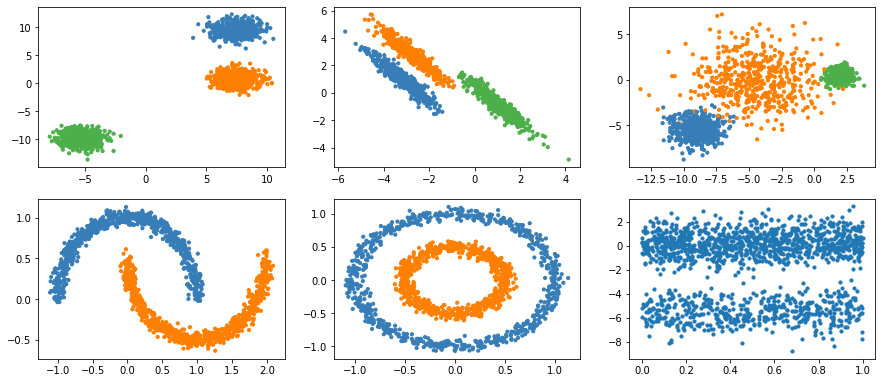

In [5]:
plt.figure(figsize=(15,10))
plt.subplot(331)
makePlot(X_blobs, y_blobs)
plt.subplot(332)
makePlot(X_ani, y_ani)
plt.subplot(333)
makePlot(X_va, y_va)
plt.subplot(334)
makePlot(X_moons, y_moons)
plt.subplot(335)
makePlot(X_circles, y_circles)
plt.subplot(336)
plt.scatter(X_no[:,0], X[:,1], s=10)

plt.show()

### Clustering 적용 예시

In [12]:
# noisy_circles 데이터로 분석
X,y = noisy_circles

In [13]:
# KMeans 군집 모델
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X)

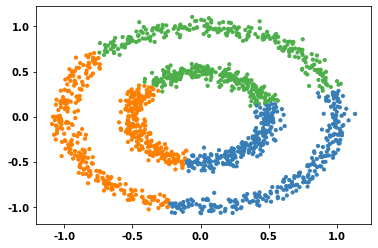

In [14]:
colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3', '#999999', '#e41a1c', '#dede00']), int(max(y_pred) + 5))))
# add black color for outliers (if any)
# colors = np.append(colors, ["#000000"])
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
plt.show()

## 아래의 탐구 과정은 코드를 통해 직접 확인하며 분석하면 Best! 

## 하지만 본인이 탐구하고 찾아본 내용에 대해 한글이나 Word로 정리해서(그렇다고 글만 있으면 X, 그림이나 예시에 대한 시각적인 자료 활용) 제출해도 OK~

### 조건
 - 복붙은 절대X
 - 본인이 이해한 내용을 바탕으로 설명할 것!
 - 아래는 탐구하는 방법에 대한 예시

# 2) Hierarchical Clustering
### 클러스터간의 거리 측정 방식에 따른 분석
 - Min(Single Link) , Max(Complete Link), Group Average, Centroid, Ward
 - 위의 방법에 따라 각각 어떤 특징이 있을까?     
 ex) https://www.stat.cmu.edu/~ryantibs/datamining/lectures/05-clus2.pdf     
 ex) 클러스터의 형태는 어떠한지? Single Link의 Chaining, Complete Link의 Crowding...    
 ex) 이상치가 어떤 영향을 미치는지?     
 ex) http://homes.di.unimi.it/valenti/SlideCorsi/MB0910/HierarchicalClustering.pdf

### 계층적 군집화(Hierarchical Clustering) 는

먼저 데이터 중 유사도가 높은(거리가 가까운) 데이터를 선택하여 군집을 형성하고 여러 개의 군집 중에서 가장 유사도가 높은(거리가 가까운) 군집 2개를 선택하여 합쳐나가면서 군집 개수를 줄여가는 방법이다

군집을 형성해 나가기 위해서는 군집 간의 거리를 측정하는 방법이 매우 중요하다. 군집 간의 거리를 측정하는 방법은 다음과 같다.

   - 비계층적 거리 측정법
     * 중심(centroid)거리
     * 단일(single)거리
     * 완전(complete)거리
     * 평균(average)거리
     
     
   - 계층적 거리 측정법
     * 중앙값(median)거리
     * 가중(weighted)거리
     * 와드(ward)거리

In [15]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


In [16]:
# 그래프에서 한글을 사용하기 위해 한글폰트를 적용
# 맥북이기에 애플고딕을 사용
plt.rc('font', size = 10, weight = 'bold')
plt.rc('axes', unicode_minus=False)

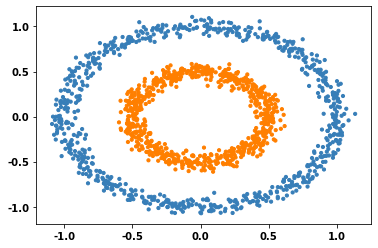

In [17]:
plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y])

In [20]:
df = pd.DataFrame(X, columns = ['column1', 'column2'])
label = pd.DataFrame(y, columns = ['label'])

  - centroid linkage 방식 : 클러스터의 중심점 간 거리를 채택하는 method

In [21]:
# method 에는 적용하고 싶은 거리 계산 방법
mergings = linkage(df, method='centroid')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


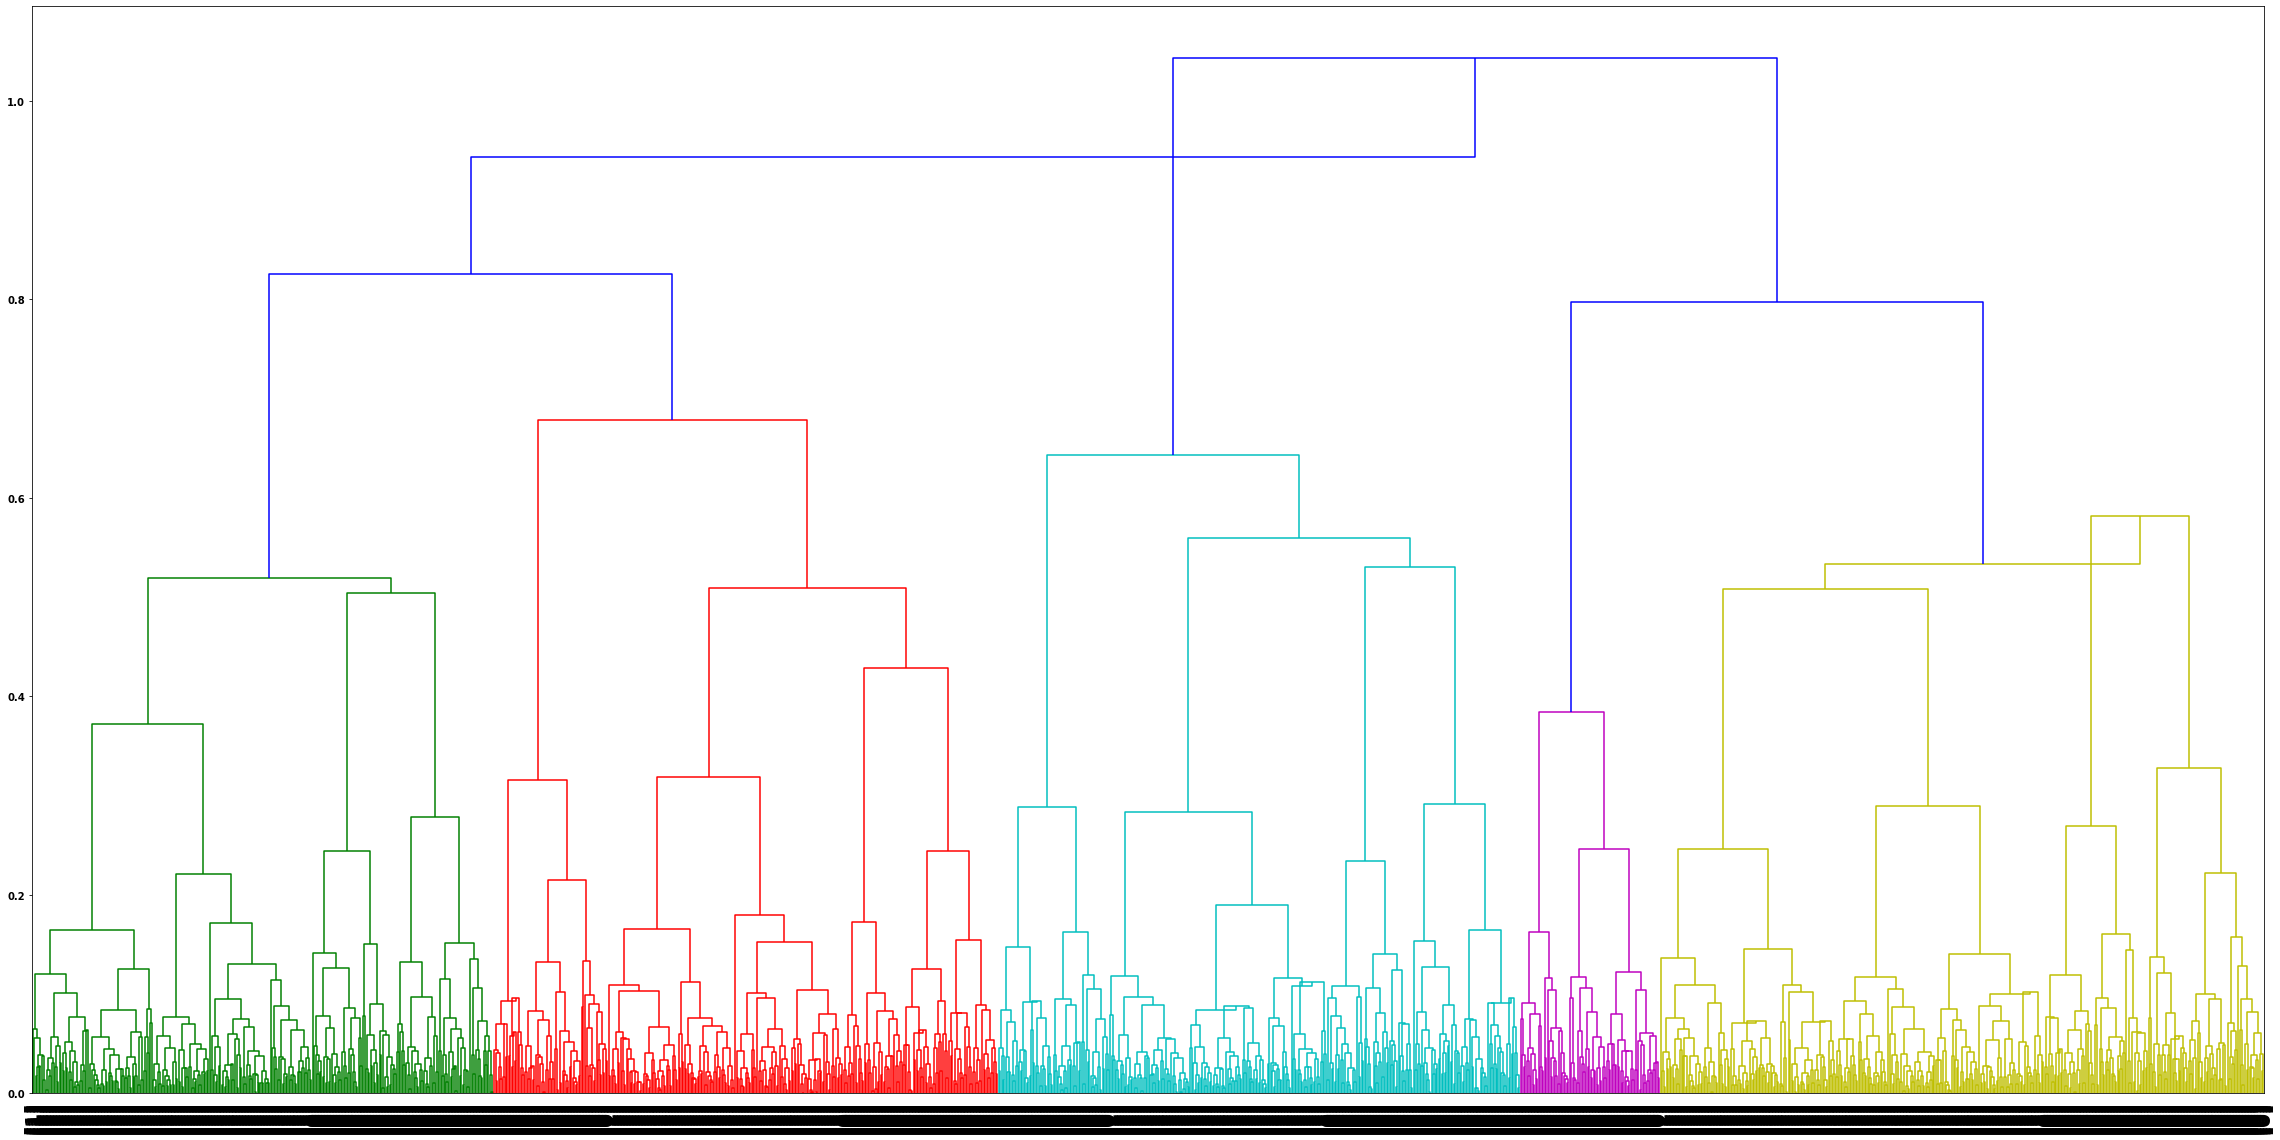

In [22]:
# centroid 거리계산을 사용했을 때 3개의 군집으로 나누어지는 것을 확인 가능
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = label.as_matrix(columns=['label']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

In [23]:
# label을 거리 1로 기준으로 군집을 나누게 되면 총 3개의 군집으로 나눠지게 되고
# 본 label이 예측된 label 로 분류된 결과는 다음과 같음
# 예측된 label 군집 1과 2는 확실한 차이가 있는 것으로 해석할 수 있음
predict = pd.DataFrame(fcluster(mergings, 0.7, criterion='distance'))
predict.columns=['predict']
result = pd.crosstab(predict['predict'],label['label'])
print(result)

label      0    1
predict          
1        122  188
2        181  158
3        205  146
4         94    0
5        148  258


In [24]:
temp = pd.concat((df,predict), axis = 1)
# temp = temp[temp['predict'] != 3]

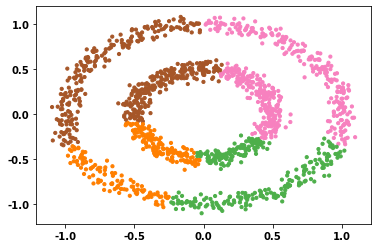

In [106]:
# 확실히 멀리 떨어져있는 데이터가 다른 군집으로 묶인 것을 확인 가능
plt.scatter(temp['column1'], temp['column2'], s=10, color = colors[temp['predict']])

  - complete linkage 방식 : 클러스터간 가장 먼 거리를 채택하는 method

In [152]:
mergings = linkage(df, method='complete')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


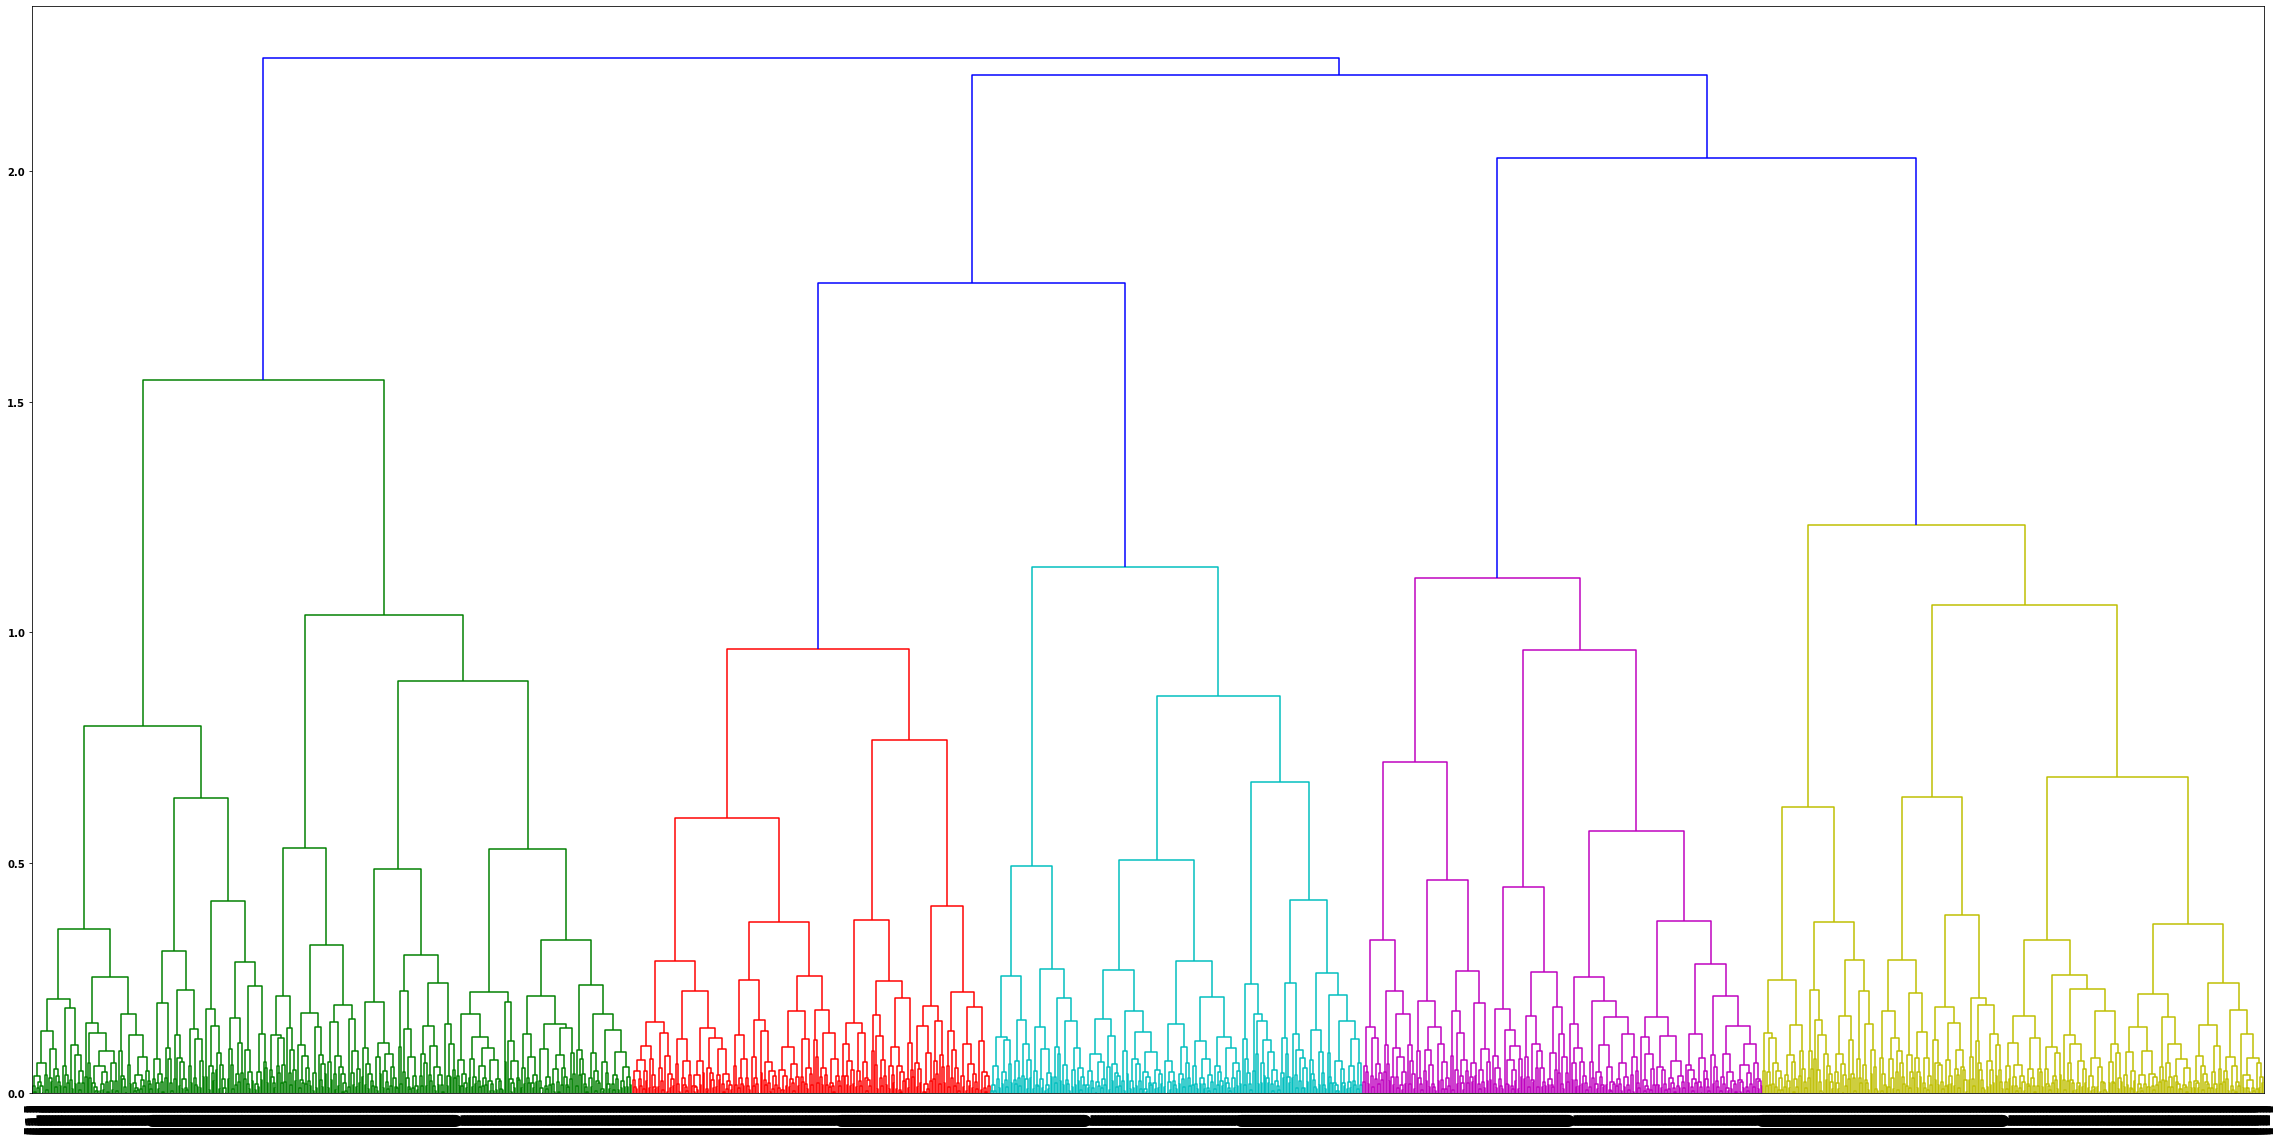

In [153]:
# complete 거리계산을 사용했을 때 2개의 군집으로 나누어지는 것 확인 가능
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = label.as_matrix(columns=['label']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

In [154]:
# centroid 경우 처럼 거리 1일 때 기준으로 나누게 되면 군집이 11개까지 나뉘어짐
predict = pd.DataFrame(fcluster(mergings, 1, criterion='distance'))
predict.columns=['predict']
result = pd.crosstab(predict['predict'],label['label'])
print(result)

label      0    1
predict          
1         78   81
2         62    0
3         64  118
4        100  141
5         64    0
6         81  105
7         87    0
8         52  130
9         78    0
10        84    0
11         0  175


In [156]:
# 1.6 을 기준으로 잡게되면 5개의 군집으로 분류
predict = pd.DataFrame(fcluster(mergings, 1.6, criterion='distance'))
predict.columns=['predict']
result = pd.crosstab(predict['predict'],label['label'])
print(result)

label      0    1
predict          
1        204  199
2        100  141
3        145  105
4        139  130
5        162  175


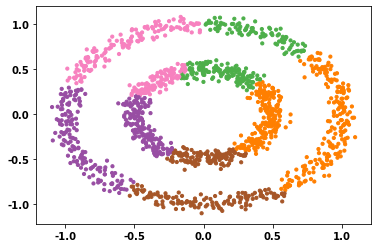

In [157]:
temp = pd.concat((df,predict), axis = 1)
# temp = temp[temp['predict'] != 3]
plt.scatter(temp['column1'], temp['column2'], s=10, color = colors[temp['predict']])

  - ward linkage 방식 : 가중거리방법과 유사하며, 두 군집 간의 유사성을 두 군집이 합쳐졌을 때의 오차제곱합(SSE)의 증가분에 기반해서 측정하는 방법이다.

In [158]:
mergings = linkage(X, method = 'ward')

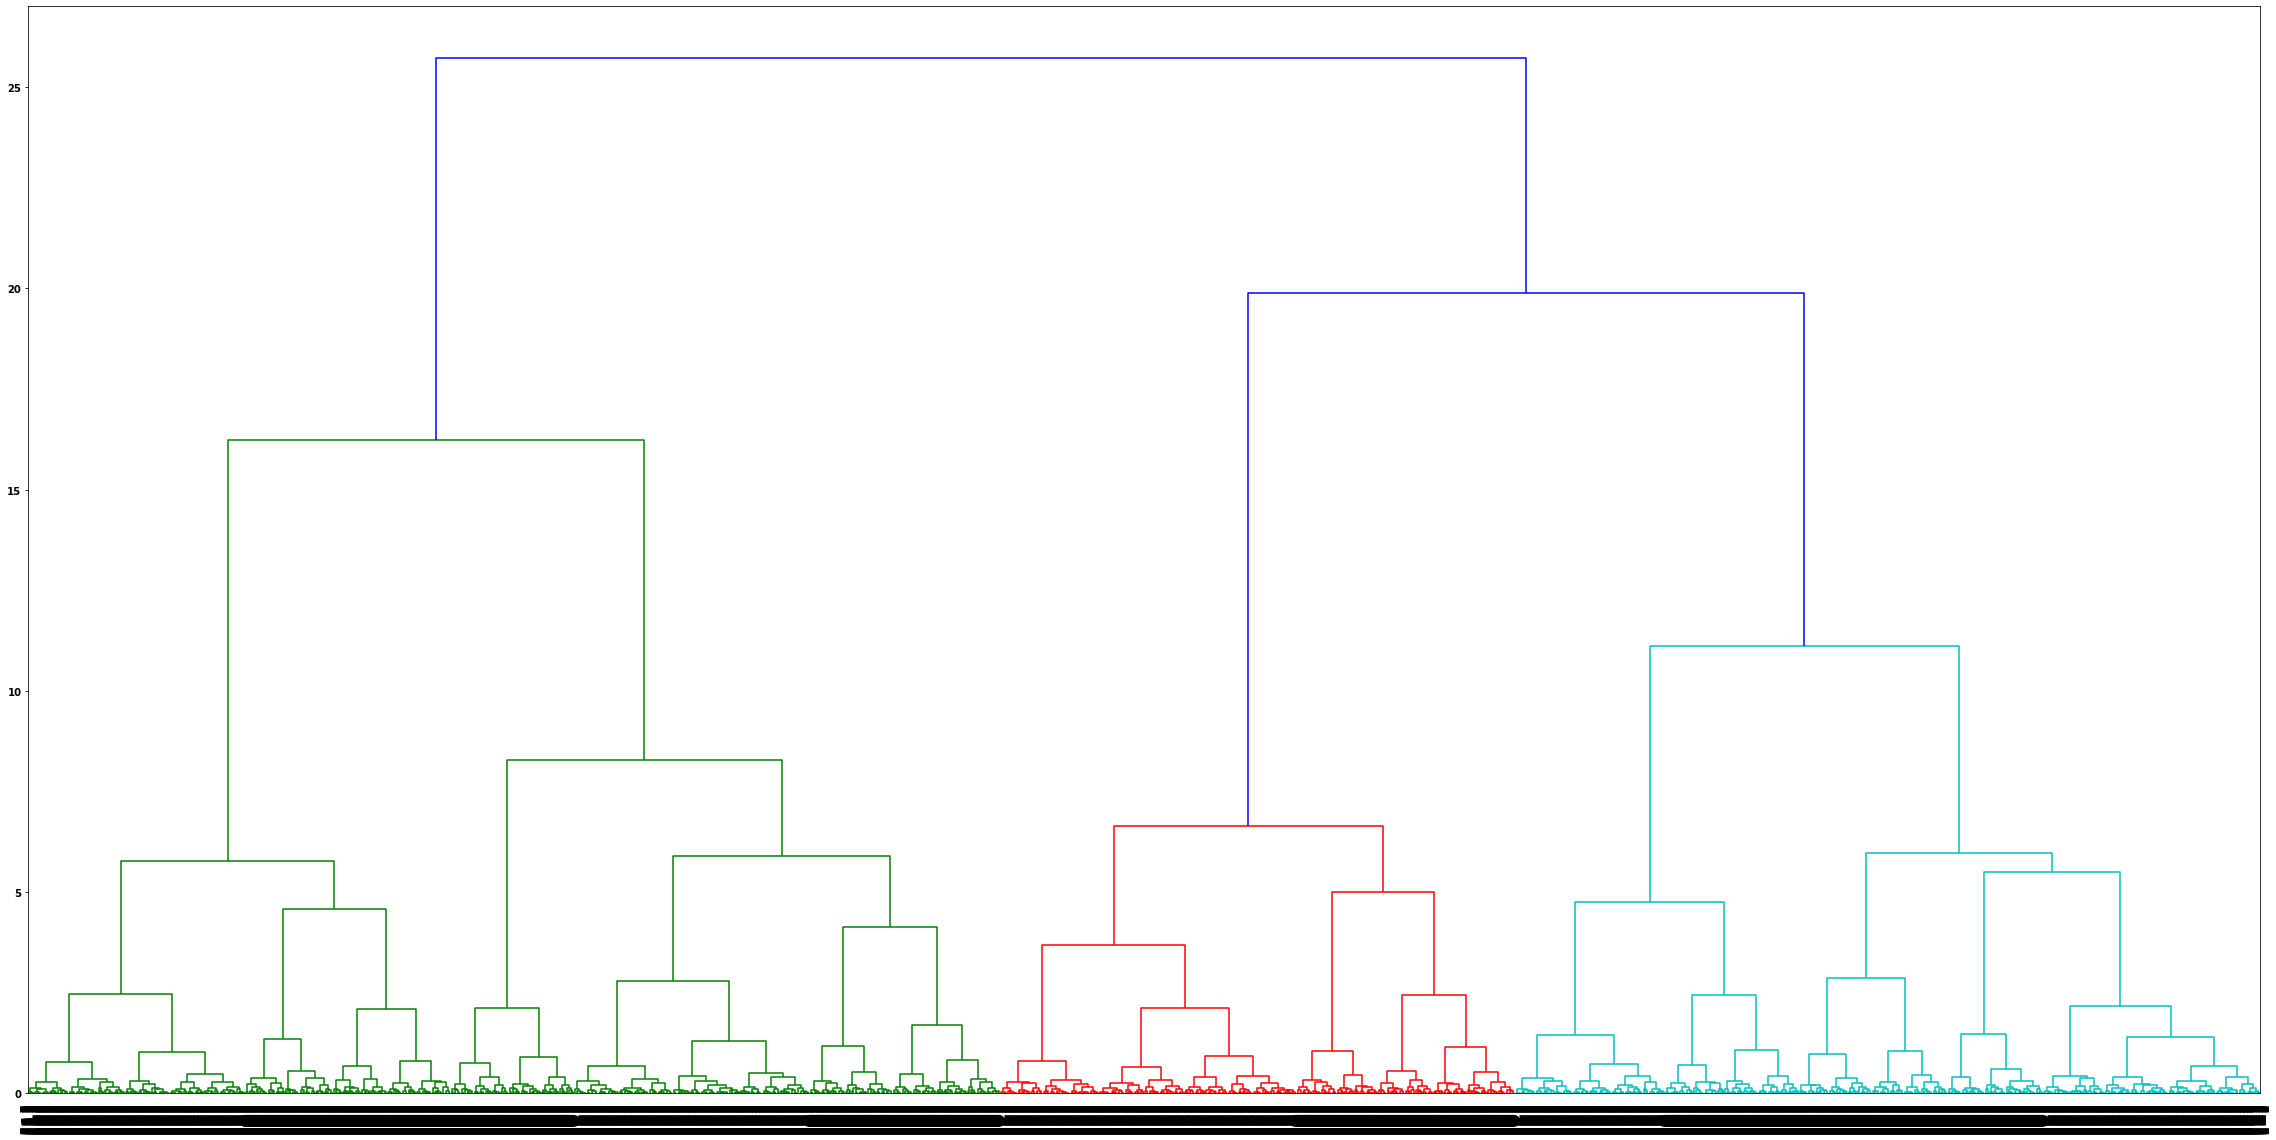

In [159]:
plt.figure(figsize=(40,20))
dendrogram(mergings,
           labels = label.as_matrix(columns=['label']),
           leaf_rotation=90,
           leaf_font_size=20,
)
plt.show()

In [165]:
# 17 을 기준으로 잡게되면 3개의 군집으로 분류됨
predict = pd.DataFrame(fcluster(merging, 17, criterion='distance'))
predict.columns=['predict']
result = pd.crosstab(predict['predict'],label['label'])
print(result)

label      0    1
predict          
1        219  224
2        163  162
3        368  364


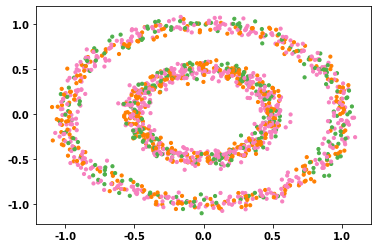

In [173]:
# 오우 엄청 이상하게 나옴
temp = pd.concat((df,predict), axis = 1)
# temp = temp[temp['predict'] == 1]
plt.scatter(temp['column1'], temp['column2'], s=10, color = colors[temp['predict']])

# 3) K-Means Clustering
### 초기값/update Centroid
 - 랜덤 초기화, Forgy 알고리즘, MacQueen 알고리즘 등
 - K-Means++?

K-Means Clustering 은 초기 군집 중심점(K)을 설정하고 각 중심점은 가까운 개체를 모으면서 군집을 형성하는 방법이다.

그렇기 때문에 초기 군집 중신점 개수(K의 개수) 와 거리 계산 방법에 따라 결과가 다르게 나올 수 있다.

K-MEans Clustering 의 핵심 원리는 2가지 이다.

   - 군집 내 응집도 최대화(maximizing cohesion within cluster) : 군집 內 중심(centroid)과 해당 군집의 각 객체 간 거리의 합 최소화

   - 군집 간 분리도 최대화(maxizing separation between clusters) : 각 군집의 중심(centroid) 間 거리 합 최대화 

In [233]:
# centroid 개수(군집 개수에 따른 시작점을 의미) 를 2~9 를 설정
# 분류 정확도가 가장 높을 때는 군집의 개수가 2 일 때
scores = []
ks = range(2,9) # Ks 를 2~9 까지
for k in ks:
    kmean = KMeans(n_clusters = k)
    kmean.fit(X)
    y_pred = kmean.labels_
    score = ((sum(y_pred == y)) / len(y))*100 # 실제 label 값과 예측 label 값 비교를 통해 실제값과 똑같이 분류되었을 때
    value = [k,score]
    scores.append(value)
    print(f"{k} 군집일 때, 분류 정확도는 {score}")

2 군집일 때, 분류 정확도는 50.93333333333333
3 군집일 때, 분류 정확도는 33.4
4 군집일 때, 분류 정확도는 24.866666666666667
5 군집일 때, 분류 정확도는 20.533333333333335
6 군집일 때, 분류 정확도는 17.133333333333333
7 군집일 때, 분류 정확도는 15.0
8 군집일 때, 분류 정확도는 13.466666666666665


### K를 위한 Elbow Point

In [234]:
# 거리계산 방법
# 각각 다른 방법으로 elbow point 를 구해봄
# cdist : Compute distance between each pair of the two collections of inputs. 기본값은 euclidean
# pdist : Pairwise distances between observations in n-dimensional space. 기본값은 euclidean
from scipy.spatial.distance import cdist, pdist

In [291]:
distortions_c = [] # k 별 k(초기 군집 중신점) 와 개체간 거리의 평균값 리스트
for k in ks:
    kmean = KMeans(n_clusters = k)
    kmean.fit(X)
    distortions_c.append(sum(np.min(cdist(X, kmean.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) # 군집 과 군집 내 개체간 거리의 총합의 평균 (mean within-cluster sum of squares)

In [236]:
# 출처 : https://datascience.stackovernet.com/ko/q/1002
# 출처 참고했으나 정확히 이해하지 못함 ㅠ
distortions_p = [] # 
for k in ks:
    kmean = KMeans(n_clusters = k)
    kmean.fit(X)
    tot_withinss = sum((np.min(cdist(X, kmean.cluster_centers_, 'euclidean'), axis=1))**2) # 군집 내 군집과 개체간 거리의 제곱합의 총합 (Total within-cluster sum of squares)
    totss = sum(pdist(X)**2)/X.shape[0] # 제곱합의 총합 (total sum of squares)
    betweenss = totss - tot_withinss # 군집과 군집 간 중심 거리의 제곱합 (The between-cluster sum of squares)
    value = betweenss/totss*100
    distortions_p.append(value)

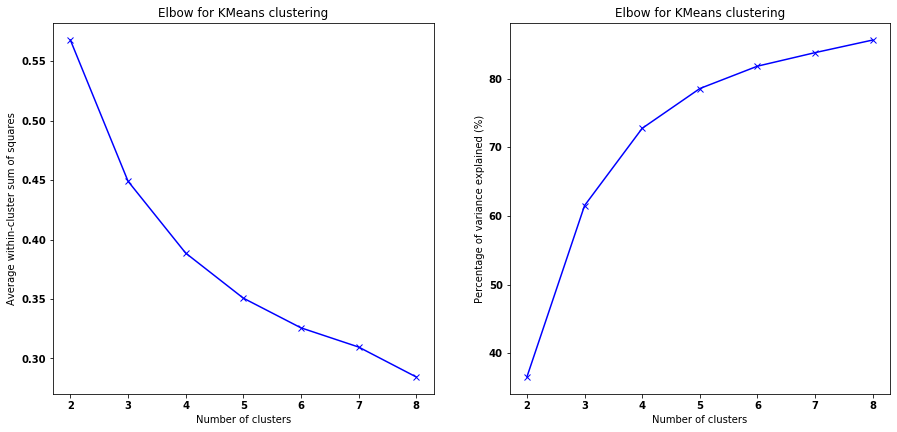

In [308]:
# Elbow point 구하기
# 두 그래프 모두 cluster 개수가 2~3, 3~4인 지점에서 경사가 완만하게 변함
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(221)
ax.plot(ks, distortions_c, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

ax = fig.add_subplot(222)
ax.plot(ks, distortions_p, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained (%)')
plt.title('Elbow for KMeans clustering')
plt.show()

### K를 위한 silhouette

In [309]:
from sklearn.metrics import silhouette_score

In [314]:
s = [] # k 별 실루엣 score을 담을 리스트
for k in ks:
    kmean = KMeans(n_clusters = k)
    kmean.fit(X)
    y_pred = kmean.labels_
    centroid = kmean.cluster_centers_
    
    s.append(silhouette_score(X, y_pred, metric='euclidean'))

Text(0.5, 1.0, "Silouette for K-means cell's behaviour")

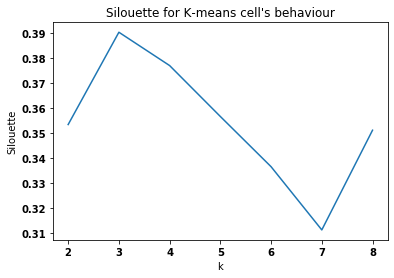

In [318]:
# k가 3일 때 가장 높은 score 를 보여줌
plt.plot(ks,s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")

# 4) DBSCAN
### Eps, min_samples(minPts)의 변화에 따른 분석
 - 파라머_Clustering.ipynb의 DBSCAN 부분
 - min_samples가 커지면?
 - eps가 커지면?

DBSCAN(Density-based spatial clustering of applications with noise) 로 앞서 살펴본 Hierarchical 과 K-Means 의 거리 기반과 다르게 밀도 기반(density_based) 클러스터링 기법이다.

밀도 기반의 클러스터링은 점이 세밀하게 몰려 있어서 밀도가 높은 부분을 클러스터링 하는 방식이다.

DBSCAN 은 밀도가 높은 곳인 '밀집 지역(dense region)'을 찾고 포인트를 지정한다.

   - eps : 설정된 포인트로 부터 밀집 지역에 해당하는 거리
   - min_samples : 설정된 포인트로부터 eps 내 존재하는 데이터의 개수 (기준)

In [330]:
from sklearn.cluster import DBSCAN
import mglearn

In [367]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_scale = scale.fit_transform(X)

In [368]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scale)
print("클러스터 레이블:\n{}".format(clusters))

클러스터 레이블:
[0 0 0 ... 0 0 0]


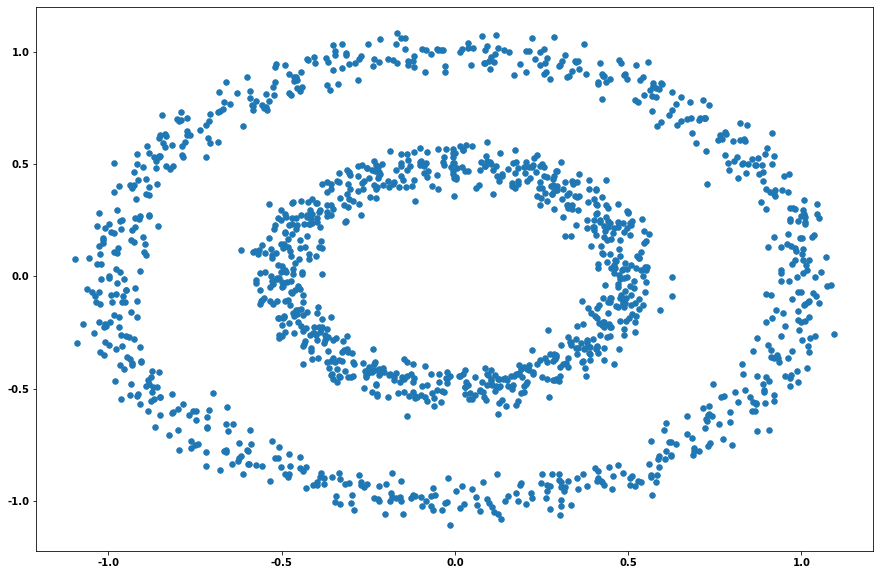

In [370]:
plt.figure(figsize = (15,10))
plt.scatter(X[:,0], X[:,1], marker = 'o', s=30)

In [411]:
# eps를 2로 했을 때에, 군집이 나뉘었음을 확인할 수 있음
dbscan_r = DBSCAN(min_samples = 3, eps = 0.1)
clusters_r = dbscan_r.fit_predict(X_scale)
print("클러스터 레이블:\n{}".format(clusters_r))

클러스터 레이블:
[-1  0  0 ...  5  4  2]


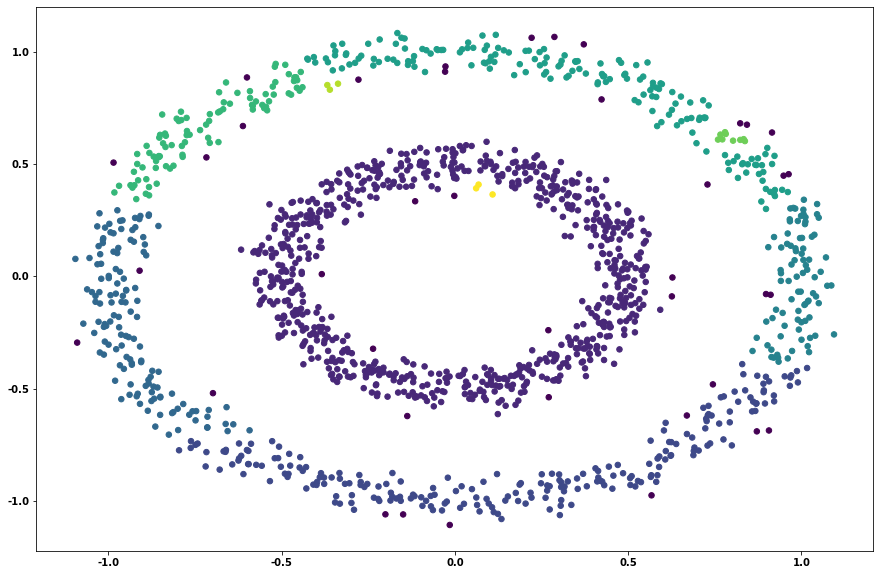

In [412]:
plt.figure(figsize = (15,10))
plt.scatter(X[:,0], X[:,1], marker = 'o', s=30, c = clusters_r)

In [426]:
X.shape[1]

2

In [431]:
# K-dist 구하기
# K-dist 는 각 포인트(모든)에서 k 번째 가까운 이웃 포인트의 거리를 모두 구한 뒤에 정렬
def k_distances2(x, k):
    dim0 = x.shape[0] # x 행 개수 (데이터 개수)
    dim1 = x.shape[1] # x 열 개수 (변수 개수)
    p = -2*x.dot(x.T)+np.sum(x**2, axis=1).T+ np.repeat(np.sum(x**2, axis=1),dim0,axis=0).reshape(dim0,dim0)
    p = np.sqrt(p) # 모든 거리를 다 구함
    p.sort(axis = 1) # 정렬
    p = p[:,:k] # k 번째 까지만 가져오기
    pm = p.flatten() # 1중 배열로 만드는 과정
    pm = np.sort(pm) # 다시 정렬
    return p, pm

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


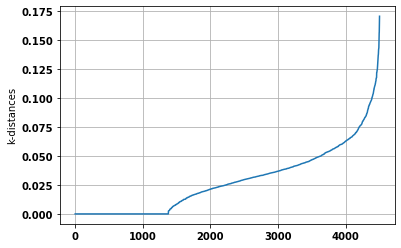

In [436]:
# k를 2로 설정, 즉 모든 점에서 2번째까지 가까운 이웃을 찾음
# 0.075 밑으로 대부분의 점이 적어도 3개의 점을 가짐
m, m2 = k_distances2(X_scale, 3)
plt.plot(m2)
plt.ylabel("k-distances")
plt.grid(True)
plt.show()

클러스터 레이블:
[-1  0  0 ...  5  6  8]


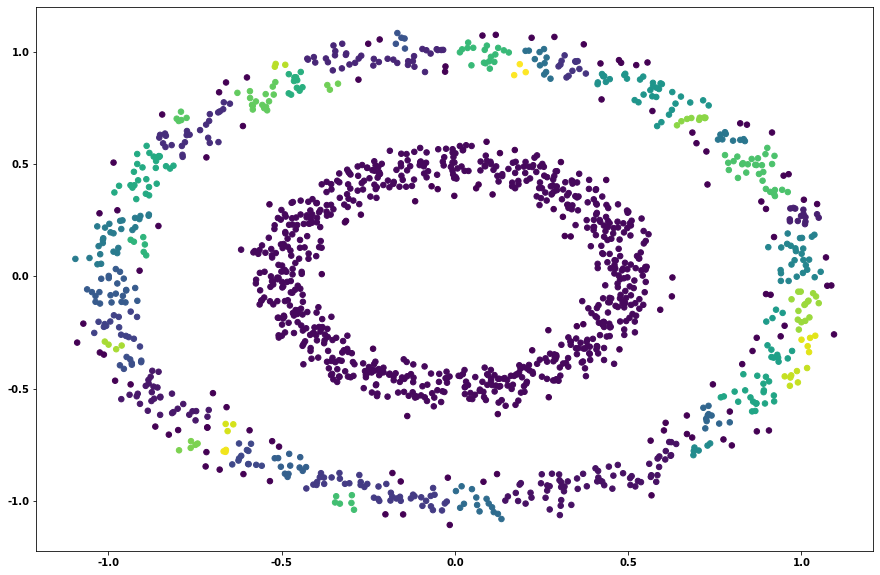

In [442]:
dbscan_r = DBSCAN(min_samples = 3, eps = 0.075)
clusters_r = dbscan_r.fit_predict(X_scale)
print("클러스터 레이블:\n{}".format(clusters_r))

plt.figure(figsize = (15,10))
plt.scatter(X[:,0], X[:,1], marker = 'o', s=30, c = clusters_r)